## Linear Regression

In this section we will implement a linear regression model trainable with SGD using numpy. Here are the objectives:

1. Implement a simple forward model: $y = W x + b$

1. build a `predict` function which returns the predicted regression value given an input $x$

1. build an `accuracy` function for a batch of inputs $X$ and the corresponding expected outputs $y_{true}$ (for regression we typically use Mean Squared Error (MSE) as metric)

1. build a `grad` function which computes the gradients for an $x$ and its corresponding expected output $y_{true}$ ; check that the gradients are well defined

1. build a `train` function which uses the `grad` function output to update $W$ and $b$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

import numpy as np

In [2]:
# our toy data for this task
X = np.random.uniform(0, 10, size=20*10)
temp = 1.3*X + 15 + np.random.normal(0, 1, size=20*10)

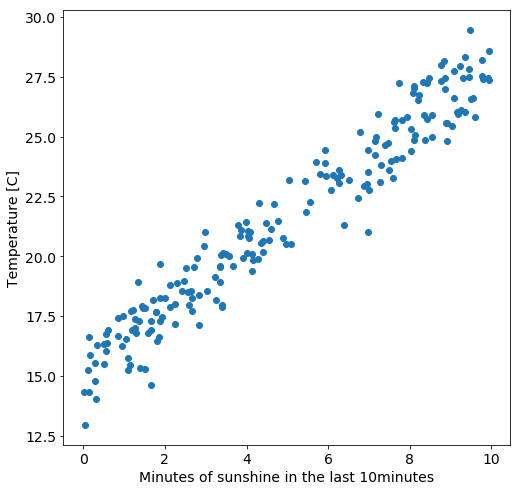

In [3]:
plt.plot(X, temp, 'o')
plt.xlabel("Minutes of sunshine in the last 10minutes")
plt.ylabel("Temperature [C]");

In [4]:
class LinearRegression():
    def __init__(self):
        self.W = np.random.uniform(high=0.5, low=-0.5)
        self.b = np.random.uniform(high=0.5, low=-0.5)
    
    def predict(self, X):
        # TODO: for each sample in X return the predicted value, X is a vector!
        return X*self.W + self.b
    
    def grad_loss(self, x, y_true):
        # TODO?: compute gradient with respect to W and b for one sample x
        # and the true value y_true
        grad_W = -1. * x * (y_true - (self.W*x + self.b))
        grad_b = -1. * (y_true - (self.W*x + self.b))
        grads = {"W": grad_W, "b": grad_b}
        return grads
    
    def train(self, x, y, learning_rate):
        # TODO: compute one step of the gradient descent update
        grads = self.grad_loss(x, y)
        self.W = self.W - learning_rate * grads["W"]
        self.b = self.b - learning_rate * grads["b"]      
        
    def loss(self, x, y):
        # TODO: compute the loss for the sample x with true value y
        return (self.predict(x) - y)**2

    def accuracy(self, X, y):
        # TODO: compute accuracy for samples X with true values y
        y_predict = self.predict(X)
        return np.sum(y_predict - y)**2 / X.shape[0]

In [5]:
lr = LinearRegression()
print('initial value of W: %.4f and b: %.4f' % (lr.W, lr.b))

initial value of W: -0.3182 and b: 0.1630


In [6]:
from sklearn.utils import shuffle

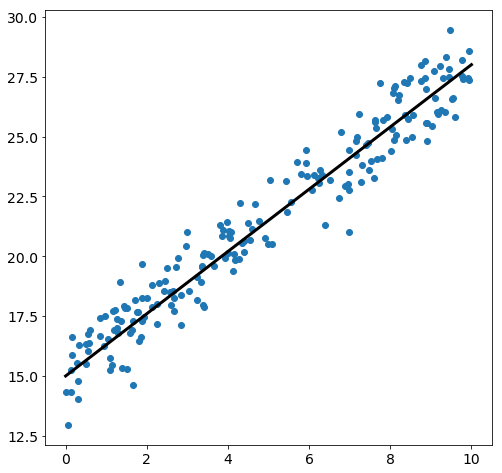

In [7]:
lr = LinearRegression()
# set parameters to true values by hand, cheating!
lr.W = 1.3
lr.b = 15.

line = np.linspace(0, 10, 100)

plt.plot(X, temp, 'o')
plt.plot(line, lr.predict(line), c='k', lw=3);

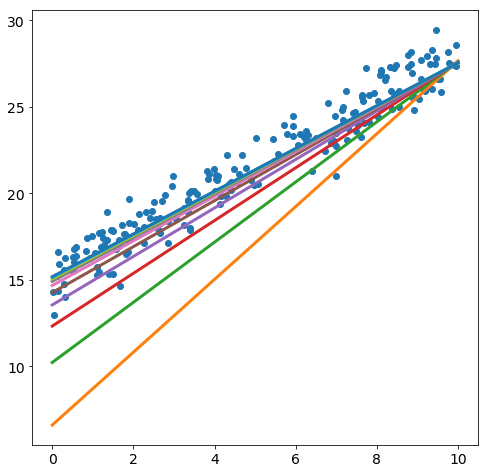

In [8]:
lr = LinearRegression()
learning_rate = 0.01

plt.plot(X, temp, 'o')

Ws = []
bs = []

for n in range(10):
    for i, (x_, y_) in enumerate(zip(X, temp)):
        lr.train(x_, y_, learning_rate)
        train_acc = lr.accuracy(X, temp)

    Ws.append(lr.W)
    bs.append(lr.b)
    plt.plot(line, lr.predict(line), lw=3);

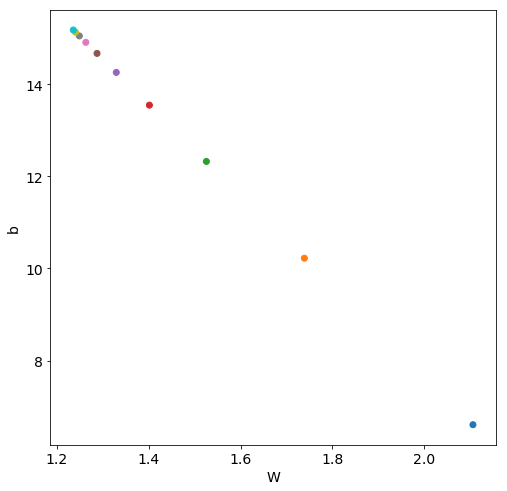

In [9]:
plt.scatter(Ws, bs, c=range(len(Ws)), cmap='tab10')
plt.xlabel('W')
plt.ylabel('b')

---

# More Details and examples

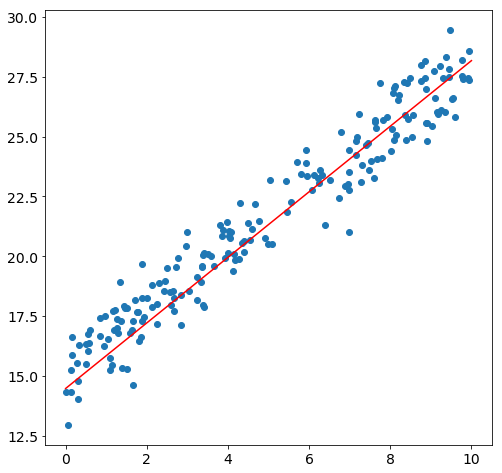

In [10]:
# with stochastic gradient descent.

lr = LinearRegression()
learning_rate = 0.01
batch_size = 10

for n in range(100):
    X_shuffled, temp_shuffled = shuffle(X, temp)
    for i, (x_, y_) in enumerate(zip(X_shuffled[:batch_size], temp_shuffled[:batch_size])):
        lr.train(x_, y_, learning_rate)
        train_acc = lr.accuracy(X, temp)

plt.plot(X, temp, 'o')
plt.plot(line, lr.predict(line), c='r');

In [11]:
lr = LinearRegression()

# 0.01 converges quickly, but seems to struggle with settling/bounces around
# with this small learning rate (0.001) we need to bump up the number of epochs to
# ~400 or more
learning_rate = 0.001
n_epochs = 400

Ws = [lr.W]
bs = [lr.b]
losses = [lr.accuracy(X, temp)]
for n in range(n_epochs):
    # shuffle points before each iteration, then selecting first N points
    # is a nice way of doing stochastic gradient descent
    x_shuffled, temp_shuffled = shuffle(X, temp)
    for i, (x_, y_) in enumerate(zip(x_shuffled, temp_shuffled)):
        lr.train(x_, y_, learning_rate)
        train_acc = lr.accuracy(X, temp)
        # turn on mini batches
        #if i > 20:
        #    break
        
    Ws.append(lr.W)
    bs.append(lr.b)
    losses.append(lr.accuracy(X, temp))
    # maybe what we should do is reduce the learning rate as training progresses
    # big steps at first, then smaller ones, start at 0.01
    #learning_rate *= 0.9
    # with a large number of iterations this gets a bit noisy
    #print("Update: train accuracy: %0.3f"% (train_acc), end=' ')
    #print('value of W: %.4f and b: %.4f' % (lr.W, lr.b))

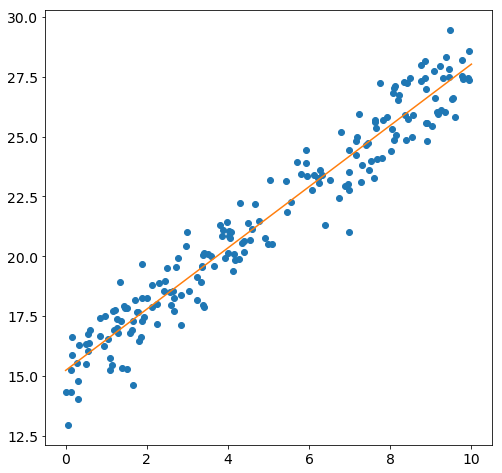

In [12]:
line = np.linspace(0, 10, 100)
plt.plot(X, temp, 'o')
plt.plot(line, lr.predict(line));

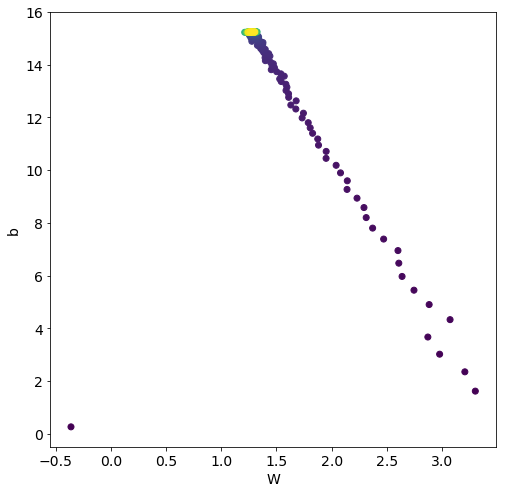

In [13]:
plt.scatter(Ws, bs, c=range(len(Ws)))
plt.xlabel('W')
plt.ylabel('b')

## With validation data

In [14]:
# make soem validation data
X_val = np.random.uniform(0, 10, size=200)
temp_val = 1.3*X_val + 15 + np.random.normal(0, 1, size=200)

In [15]:
lr = LinearRegression()

# 0.01 converges quickly, but seems to struggle with settling/bounces around
# with this small learning rate (0.001) we need to bump up the number of epochs to
# ~400 or more
learning_rate = 0.001
n_epochs = 400

losses = [lr.accuracy(X, temp)]
val_losses = [lr.accuracy(X_val, temp_val)]
for n in range(n_epochs):
    # shuffle points before each iteration, then selecting first N points
    # is a nice way of doing stochastic gradient descent
    x_shuffled, temp_shuffled = shuffle(X, temp, random_state=1)
    for i, (x_, y_) in enumerate(zip(x_shuffled, temp_shuffled)):
        lr.train(x_, y_, learning_rate)

    losses.append(lr.accuracy(X, temp))
    val_losses.append(lr.accuracy(X_val, temp_val))

In [16]:
print(lr.W, lr.b)

1.26287819991 15.2349215895


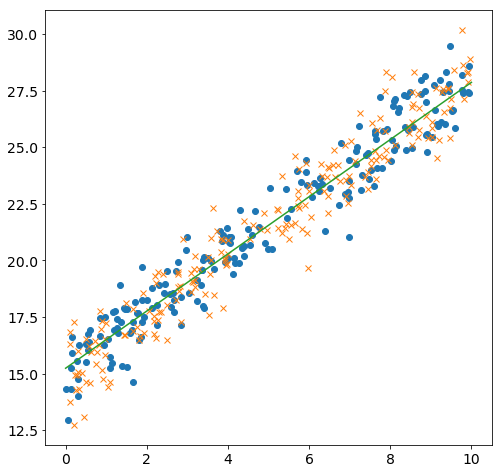

In [17]:
line = np.linspace(0, 10, 20)
plt.plot(X, temp, 'o')
plt.plot(X_val, temp_val, 'x')

plt.plot(line, lr.predict(line));

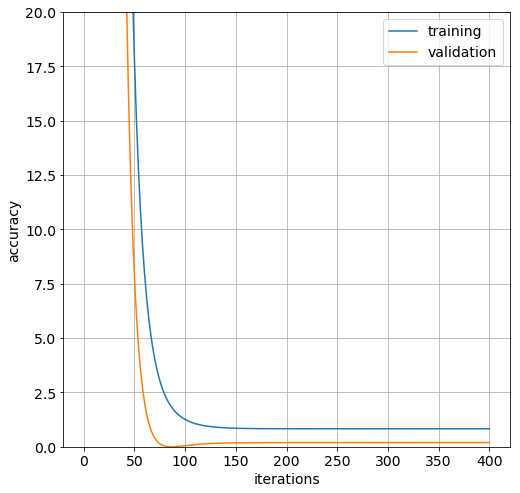

In [18]:
plt.plot(losses, label='training')
plt.plot(val_losses, label='validation')
plt.ylim([0, 20])
plt.legend(loc='best')
plt.ylabel("accuracy")
plt.xlabel("iterations");
plt.grid();